In [1]:
import numpy as np
from numpy import exp, log
import matplotlib.pyplot as plt

Model constants

In [2]:

d = [239, 4.1] # time constants for temperature model
tt = np.linspace(0,100,100) # time series
T = np.zeros(tt.shape) # temperature time series
T[0] = 20 # initial temperature value
ECS = 2.86 # K
TCR = 1.53 # K
D = log(2)/log(1.01)
F2x = 3.71 # W/m^2
epsilon = np.ones((13,1)) # forcing-specific efficacies
epsilon[9]=3 # black carbon on snow efficacy
F = np.zeros((len(tt),13)) # effective radiative forcing series


find $q_1$ and $q_2$ assuming $F_{2x}$ constant

In [3]:
a11 = F2x
a12 = F2x
a21 = F2x*(1-d[0]/D*(1-exp(-D/d[0])))
a22 = 1-d[1]/D*(1-exp(D/d[1]))
A = np.matrix([[a11,a12],[a21,a22]])
b = np.array([ECS,TCR])
q = np.linalg.solve(A,b)

time loop

In [4]:

for n, t in enumerate(tt):
    if n==0:
        # ignore the first iteration (no data is available at t=-1)
        continue
    # evaluate the temperature at time t=n
    T_0 = T[n-1]
    T_1 = 0
    for i in range(0,2):
        T_1 = T_1 + T_0*exp(1/d[i])
        for j in range(0,13):
            T_1 = T_1 + q[i]*epsilon[j]*F[i,j]*(1-exp(1/d[i]))
    T[n]=T_1


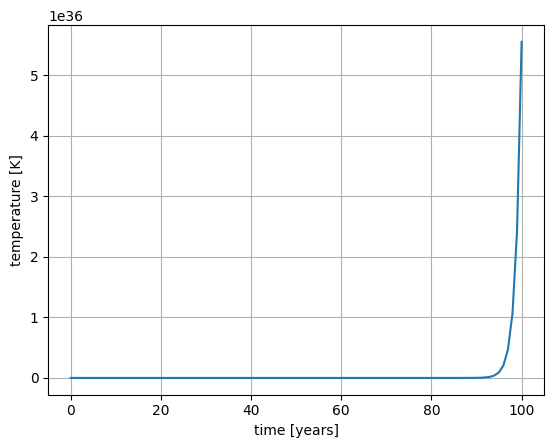

In [5]:

plt.plot(tt,T)
plt.xlabel('time [years]')
plt.ylabel('temperature [K]')
plt.grid()
plt.show()